In [3]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

path = "./물금고등학교-익명의-숲_생활편/"


In [31]:
with open(path + "data/collect.json", "r", encoding='UTF-8') as j:
    json_file = json.load(j)
df_original = pd.json_normalize(json_file['48:3F:DA:77:26:C0'])
df_original['date'] = pd.to_datetime(df_original['date'], format='%Y-%m-%d %H:%M:%S')

df_original.iloc[:, 1:] = df_original.iloc[:, 1:].astype(float)
df_original.drop(columns=['date'], inplace=True)

In [32]:
def ShowBoxPlot():
    sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

    plt.figure(figsize=(25, 5))
    plt.subplot(1, 5, 1)
    sns.boxplot(y='values.tmp', data=df_original)
    plt.subplot(1, 5, 2)
    sns.boxplot(y='values.hum', data=df_original)
    plt.subplot(1, 5, 3)
    sns.boxplot(y='values.co2', data=df_original)
    plt.subplot(1, 5, 4)
    sns.boxplot(y='values.pm', data=df_original)
    plt.subplot(1, 5, 5)
    sns.boxplot(y='values.voc', data=df_original)
    plt.show()

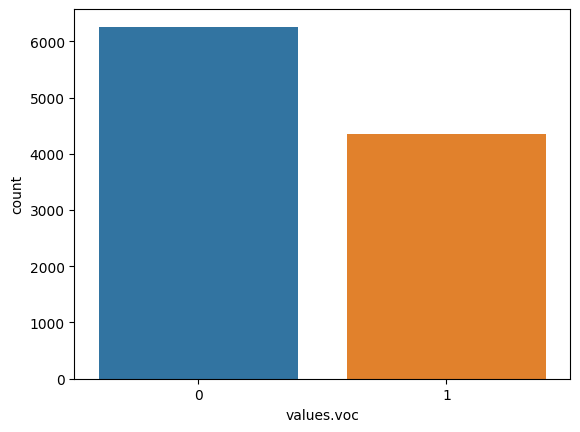

In [33]:
df_pre = df_original
df_pre['values.voc'] = df_pre['values.voc'].apply(lambda x: x > 200)
df_pre['values.voc'].replace(True, 1, inplace=True)
df_pre['values.voc'].replace(False, 0, inplace=True)

sns.countplot(x=df_pre['values.voc'])
plt.show()

In [34]:
df_pre.drop(columns=['values.voc'])

,values.tmp,values.hum,values.co2,values.pm
0,22.4,55.0,409.97,323.19
1,22.4,54.0,409.98,585.16
2,22.4,54.0,410.01,326.12
3,22.4,54.0,410.05,316.34
4,22.4,54.0,410.03,187.31
...,...,...,...,...
10611,26.6,64.0,1183.98,173.63
10612,26.6,64.0,1183.99,163.85
10613,26.6,64.0,1183.98,175.58
10614,26.6,64.0,1184.02,182.42


In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled = scaler.fit_transform(df_pre.drop(columns=['values.voc']))

df = pd.DataFrame(scaled)

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 필요한 라이브러리 불러옴
import numpy as np
import tensorflow as tf

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분
np.random.seed(3)
tf.random.set_seed(3)

# 환자의 기록과 수술 결과를 X와 Y로 구분하여 저장
X = df_pre.iloc[:, :4]
Y = df_pre.iloc[:, 4]

# 딥러닝 구조를 결정(모델을 설정하고 실행하는 부분)
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 딥러닝 실행
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
model.fit(X, Y, epochs=100, batch_size=10, validation_batch_size=0.2)


Epoch 1/100
107/107 [==============================] - 0s 736us/step - loss: 1.6688 - binary_accuracy: 0.8072
Epoch 2/100
107/107 [==============================] - 0s 792us/step - loss: 0.1870 - binary_accuracy: 0.9610
Epoch 3/100
107/107 [==============================] - 0s 811us/step - loss: 0.1753 - binary_accuracy: 0.9634
Epoch 4/100
107/107 [==============================] - 0s 689us/step - loss: 0.1725 - binary_accuracy: 0.9630
Epoch 5/100
107/107 [==============================] - 0s 736us/step - loss: 0.1720 - binary_accuracy: 0.9618
Epoch 6/100
107/107 [==============================] - 0s 736us/step - loss: 0.1919 - binary_accuracy: 0.9561
Epoch 7/100
107/107 [==============================] - 0s 679us/step - loss: 0.1736 - binary_accuracy: 0.9603
Epoch 8/100
107/107 [==============================] - 0s 689us/step - loss: 0.1659 - binary_accuracy: 0.9607
Epoch 9/100
107/107 [==============================] - 0s 698us/step - loss: 0.1624 - binary_accuracy: 0.9615
Epoch 10/1